# Exercise

Use the code in this notebook to complete the following exercises:

1. For `df1`:

    - Take a look at the data in `df1`.
    - Does `x` increase from time one to time two?
    - Visualize the relationship between `x` and `time`.
    - Run a statistical test to further examine the relationship between these features.
    
 1. For `df2`:
 
    - Take a look at the data in `df2`.
    - Visualize the relationship between `x` and `y`.
    - How would you describe the relationship between `x` and `y`?
    - Run a statistical test to examine the relationship between `x` and `y`.

1. For `df3`:

    - Take a look at the data in `df3`
    - Which surgeon has the higher success rate?
    - If you had to have heart bypass surgery, which surgeon would you go to?

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

In [65]:
sns.set_theme(style="darkgrid")

### 1. For `df1`:

   - Take a look at the data in `df1`.
   - Does `x` increase from time one to time two?
   - Visualize the relationship between `x` and `time`.
   - Run a statistical test to further examine the relationship between these features.
    

In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   group   200 non-null    object 
 1   x       200 non-null    float64
 2   time    200 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.8+ KB


In [4]:
df1.head()

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one


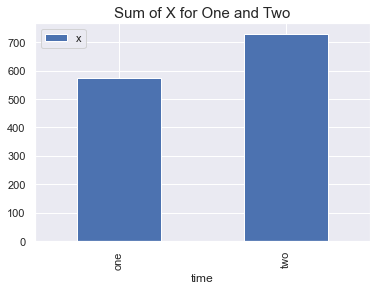

In [66]:
df1.groupby('time').sum().plot.bar()
plt.title('Sum of X for One and Two', fontsize = 15)
plt.show()

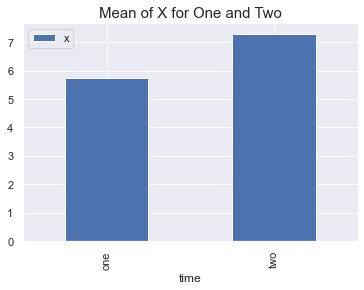

In [67]:
df1.groupby('time').mean().plot.bar()
plt.title('Mean of X for One and Two', fontsize = 15)
plt.show()

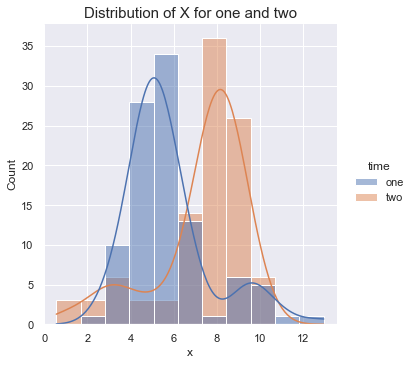

In [68]:
sns.displot(data = df1, x = 'x', hue = 'time', kde = True)
plt.title('Distribution of X for one and two', fontsize = 15)
plt.show()

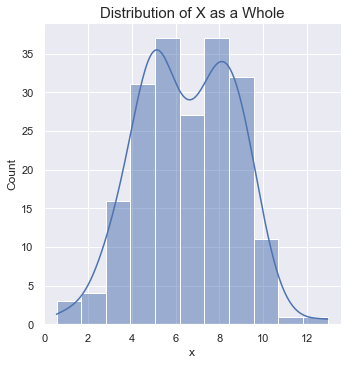

In [69]:
sns.displot(data = df1, x = 'x', kde = True)
plt.title('Distribution of X as a Whole', fontsize = 15)
plt.show()

In [70]:
df1.time.value_counts()

two    100
one    100
Name: time, dtype: int64

#### Mann-Whitney Test for x and Time

${H_0}$: The mean for x one == the mean of x two

${H_a}$: The mean for x one != the mean of x two

alpha = 0.05


In [71]:
import explore as e

In [72]:
alpha = 0.05 

In [73]:
# set up dataframes of only one and two
one = df1[df1['time'] == 'one']
two = df1[df1['time'] == 'two']

t, p = stats.mannwhitneyu(one['x'], two['x'])

In [74]:
e.eval_stats_test(p, alpha)

We can reject our null hypothesis


In [75]:
print(t, p)

2600.0 2.2741014828327088e-09


### 2. For `df2`:
 
   - Take a look at the data in `df2`.
   - Visualize the relationship between `x` and `y`.
   - How would you describe the relationship between `x` and `y`?
   - Run a statistical test to examine the relationship between `x` and `y`.

In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       200 non-null    float64
 1   y       200 non-null    float64
 2   group   200 non-null    object 
dtypes: float64(2), object(1)
memory usage: 4.8+ KB


In [77]:
df2.head()

,x,y,group
0,101.243108,597.915453,a
1,107.492036,579.638663,a
2,105.348935,614.607337,a
3,99.981116,607.082320,a
4,102.764199,606.082835,a


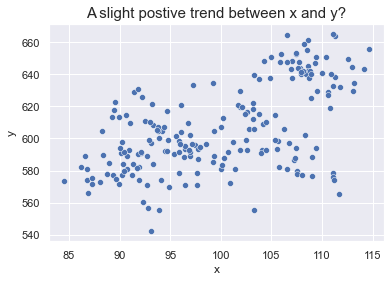

In [78]:
sns.scatterplot(data = df2, x = 'x', y = 'y')
plt.title('A slight postive trend between x and y?', fontsize = 15)
plt.show()

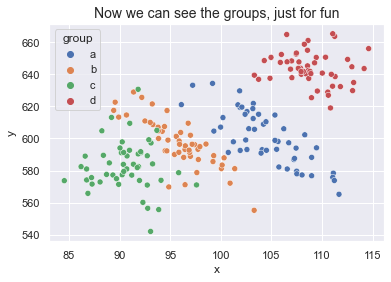

In [79]:
sns.scatterplot(data = df2, x = 'x', y = 'y', hue = 'group')
plt.title("Now we can see the groups, just for fun", fontsize = 14)
plt.show()

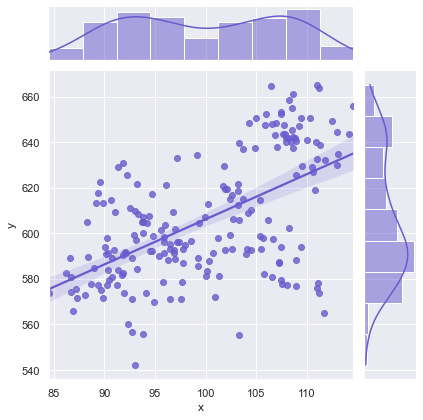

In [85]:
sns.jointplot(data = df2, x = 'x', y = 'y', color  = 'slateblue', kind ='reg')
plt.show()


The relationship between x and y is slightly positive. As x goes up so does y. But the data is very spread out.

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


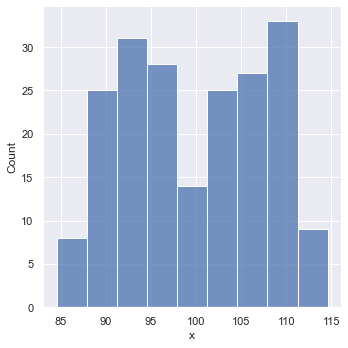

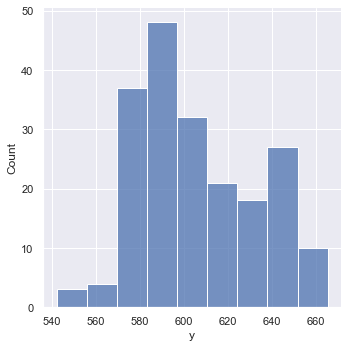

In [102]:
sns.displot(ax = axes[0], data = df2, x = 'x')

sns.displot(ax = axes[1], data = df2, x = 'y')


#### Pearson R Stats Test 

${H_0}$: There is no linear correlation between x and y

${H_a}$: There is a linear correlation between x and y

alpha = 0.05


In [103]:
r, p = stats.pearsonr(df2.x, df2.y)

e.eval_stats_test(p, alpha)

We can reject our null hypothesis


In [104]:
print(r, p)

0.5693902765694359 1.3960403186191819e-18


### 1. For `df3`:

   - Take a look at the data in `df3`
   - Which surgeon has the higher success rate?
   - If you had to have heart bypass surgery, which surgeon would you go to?

In [105]:
df3.head()

,surgeon,surgery,success
0,A,appendectomy,1
1,B,appendectomy,1
2,A,heart bypass,0
3,A,appendectomy,1
4,A,heart bypass,1


In [112]:
df3.groupby(['surgeon']).sum()

,success
surgeon,
A,421
B,376


Surgeon A had more successful surgeries with 421.

Let's look at the rate

In [111]:
df3.groupby(['surgeon', 'success']).count()

surgery
surgeon success         
A       0             59
        1            421
B       0            144
        1            376

In [116]:
df3.groupby('surgeon').mean()

,success
surgeon,
A,0.877083
B,0.723077


Surgeon A has a higher success rate at 87.7%.

In [118]:
# filter df for heart bypass surgeries
# group by surgeon and get the mean for success

df3[df3['surgery'] == 'heart bypass'].groupby('surgeon').mean()

,success
surgeon,
A,0.656566
B,0.672249


If I needed a surgeon for a heart bypass I would go to surgeon B. His success rate with heart bypass surgeries is slightly higher at 67.2%  